
## **Introdução ao Deep Learning**

### **Objetivos**
1. Entender os conceitos fundamentais de redes neurais profundas, incluindo arquiteturas convolucionais e camadas específicas.  
2. Explorar a funcionalidade e o impacto de diferentes tipos de camadas em redes neurais.  
3. Implementar redes neurais convolucionais (CNNs) do zero e compreender os processos de convolução e pooling.  
4. Introduzir e aplicar Transfer Learning usando modelos pré-treinados.  
5. Utilizar técnicas para monitoramento e otimização de redes neurais, como TensorBoard, análise de hiperparâmetros e Early Stopping.  
6. Aplicar um modelo YOLO para detecção de objetos
---

### **Sumário**
1. Introdução ao Deep Learning e às funcionalidades de cada camada.  
2. Importação de bibliotecas.  
3. Preparação e download dos datasets.  
4. Desenvolvimento de uma rede convolucional sequencial.  
5. Treinamento da rede convolucional.  
6. Transfer Learning com modelos pré-treinados.  
7. Data Augmentation
8. Uso do TensorBoard para monitoramento dos treinamentos.  
9. Utilização da YOLO para detecção de objetos.  


---

### **1. Introdução**

#### **O que é Deep Learning?**  
Deep Learning é uma subárea do aprendizado de máquina que utiliza redes neurais profundas para modelar dados de alta complexidade. Essas redes são compostas por camadas interligadas que transformam as entradas em saídas preditivas.  

#### **Estrutura das Redes Neurais Profundas**
1. **Entrada:** Os dados são processados na forma de tensores ($(x \in \mathbb{R}^{n}$)). Para imagens, isso envolve dimensões como altura, largura e canais de cor (ex.: $(32 \times 32 \times 3$)).
2. **Camadas ocultas:** Realizam transformações no espaço latente, aprendendo representações internas dos dados.
3. **Saída:** Predições são geradas, como classes ou coordenadas de detecção.  

#### **Funcionalidades das Camadas**  
Cada camada tem um papel específico no aprendizado da rede:  

1. **Camadas de Convolução (Conv2D):**
   Realizam a operação de convolução, destacando características locais dos dados, como bordas e texturas.  

   **Equação da convolução discreta:**
   $
   (I * K)(x, y) =
   \sum_{m=-k}^k \sum_{n=-k}^k I(x-m, y-n) \cdot K(m, n)
   $

   Onde:  
   - $(I$): Entrada (imagem).  
   - $(K$): Kernel (filtro).  
   - $(x, y)$: Coordenadas no mapa de características.  

2. **Camadas de Pooling (MaxPooling e AveragePooling):**
   Reduzem a dimensionalidade espacial dos dados, capturando os elementos mais relevantes.  
   - **MaxPooling:** Retém o maior valor em uma região.  
   - **AveragePooling:** Calcula a média dos valores em uma região.  

3. **Camadas de Normalização (BatchNormalization):**
   Normalizam a saída de cada camada para estabilizar e acelerar o treinamento.  

4. **Camadas de Ativação:**
   Introduzem não-linearidade.  
   - **ReLU (Rectified Linear Unit):**  
     $
     f(x) = \max(0, x)
     $
   - **Softmax:** Transforma as saídas em probabilidades.  
     $
     \sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}
     $

5. **Camadas Densas:**  
   Conectam todos os neurônios de uma camada à próxima, combinando as características aprendidas.  

---



### **2. Importação de Bibliotecas**

#### **Bibliotecas Utilizadas**
- **TensorFlow/Keras:** Criação, treinamento e avaliação de redes neurais.  
- **Matplotlib:** Visualização de dados e métricas de desempenho.  
- **YOLO (Ultralytics):** Para tarefas de detecção de objetos em imagens.  



In [1]:
!pip install ultralytics
import os
import glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from datetime import datetime
from PIL import Image
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Input, Dropout
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.applications import VGG16
from ultralytics import YOLO



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### **3. Preparação e Download dos Datasets**

**CIFAR-10:**
   - **Descrição:** Conjunto de dados composto por 60.000 imagens coloridas de 10 classes distintas. Cada imagem possui resolução de 32x32 pixels e está associada a uma única classe. É utilizado para problemas de classificação genérica, especialmente para introdução ao aprendizado supervisionado.
   - **Características:**
     - **Classes:** Avião, automóvel, pássaro, gato, cervo, cachorro, sapo, cavalo, navio e caminhão.
     - **Tamanho das imagens:** 32x32 pixels com 3 canais (RGB).
     - **Divisão:** 50.000 imagens para treinamento e 10.000 para teste.
     - **Desafio:** Pequena resolução das imagens, o que dificulta a distinção de detalhes finos.
   - **Aplicação:** Classificação visual em tarefas genéricas com classes distintas.


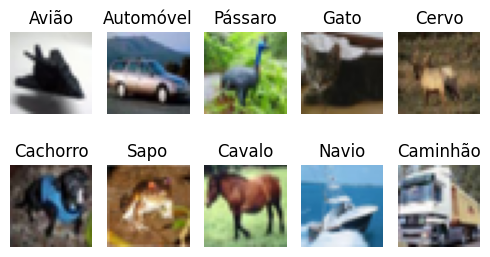

In [2]:
# Carregando os dados
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

# Classes do CIFAR-10
class_names = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Cervo',
               'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']

# Visualizando exemplos de cada classe
plt.figure(figsize=(5, 3))
for i in range(10):  # Mostrando um exemplo para cada classe
    plt.subplot(2, 5, i + 1)
    idx = np.where(y_train_cifar.flatten() == i)[0][0]  # Índice de uma imagem da classe
    plt.imshow(x_train_cifar[idx])
    plt.title(class_names[i])
    plt.axis('off')

plt.tight_layout()
plt.show()




**MNIST:**
   - **Descrição:** Conjunto de 70.000 imagens monocromáticas (escala de cinza) de dígitos manuscritos, variando de 0 a 9. Este é um dos datasets mais utilizados para introdução a redes neurais e aprendizado profundo.
   - **Características:**
     - **Classes:** Dígitos de 0 a 9.
     - **Tamanho das imagens:** 28x28 pixels com 1 canal (grayscale).
     - **Divisão:** 60.000 imagens para treinamento e 10.000 para teste.
     - **Desafio:** Reconhecimento de escrita manual, com variações no estilo de escrita.
   - **Aplicação:** Reconhecimento de padrões básicos, como em OCR (Reconhecimento Óptico de Caracteres).



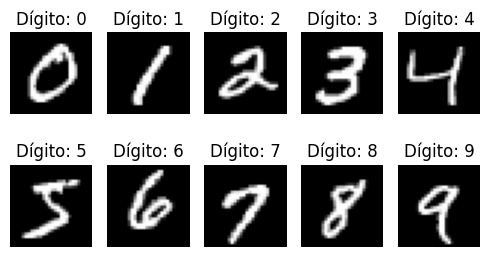

In [3]:

# Carregando os dados
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

# Visualizando exemplos das classes do MNIST
plt.figure(figsize=(5, 3))
for i in range(10):  # Mostrando um exemplo para cada dígito
    plt.subplot(2, 5, i + 1)
    idx = np.where(y_train_mnist == i)[0][0]  # Índice de uma imagem da classe
    plt.imshow(x_train_mnist[idx], cmap='gray')
    plt.title(f'Dígito: {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()



### **4. Desenvolvimento de uma Rede Convolucional Sequencial**

Uma rede sequencial é composta por camadas empilhadas que processam as entradas em uma sequência fixa.  

- **Camada Conv2D:** Detecta padrões locais.  
- **MaxPooling2D:** Reduz a dimensionalidade, mantendo os padrões mais importantes.  
- **Dense:** Combina características aprendidas para classificar.



In [4]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()


c:\Users\IvoAg\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

**Visualização das imagens resultantes dos blocos de convolução**

O código a seguir implementa uma rede convolucional sequencial e visualiza os resultados das camadas convolucionais.

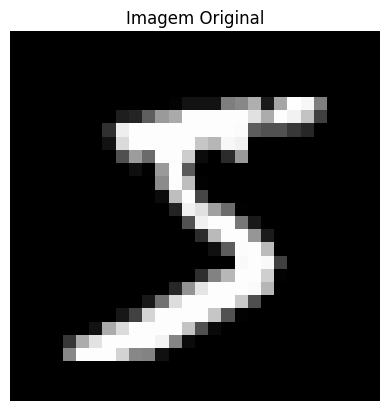

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


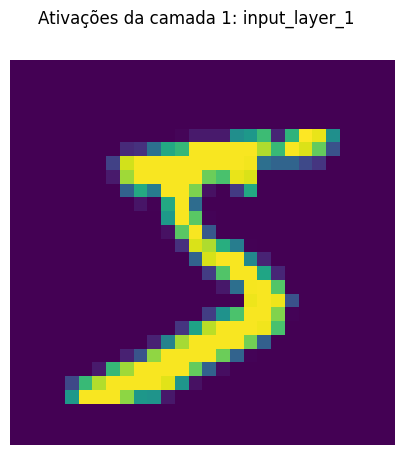

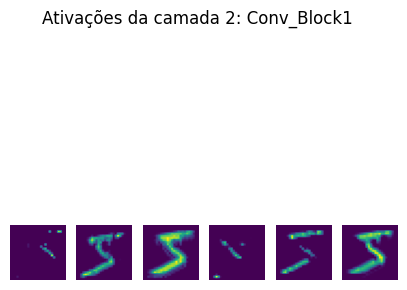

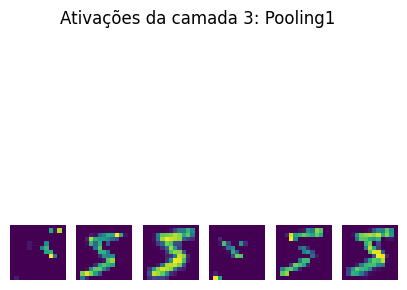

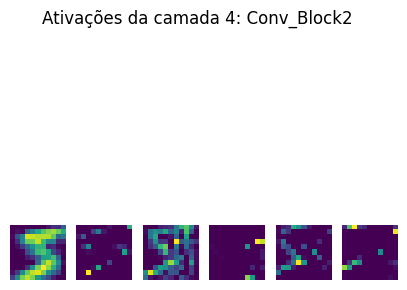

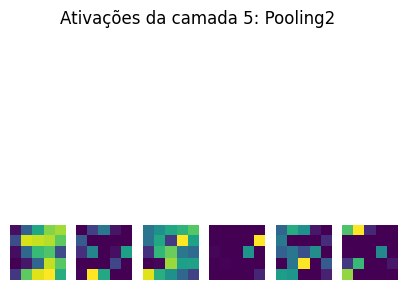

In [5]:
# Criar o modelo usando a API Funcional
inputs = Input(shape=(28, 28, 1))  # Imagens do MNIST são 28x28 com 1 canal (grayscale)
x = Conv2D(32, (3, 3), activation='relu', name="Conv_Block1")(inputs)
x = MaxPooling2D((2, 2), name="Pooling1")(x)
x = Conv2D(64, (3, 3), activation='relu', name="Conv_Block2")(x)
x = MaxPooling2D((2, 2), name="Pooling2")(x)


# Modelo final
model = Model(inputs=inputs, outputs=x)

# Chamar o modelo com uma entrada para inicializar as camadas
dummy_input = np.expand_dims(x_train_mnist[0], axis=0)  # Adiciona dimensão do batch
_ = model(dummy_input)  # Inicializa o modelo explicitamente

# Função para visualizar as ativações de todas as camadas
def visualize_activations_all_layers(model, image):
    """
    Visualiza as ativações de todas as camadas convolucionais e de pooling no modelo.
    """
    # Obter as saídas de todas as camadas
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)

    # Calcular as ativações para a imagem de entrada
    activations = activation_model.predict(image[np.newaxis, ...])  # Expande a dimensão do batch

    for i, activation in enumerate(activations):
        # Se a saída for 2D (camadas densas, pooling, etc.), pule
        if len(activation.shape) != 4:
            continue

        num_filters = activation.shape[-1]  # Número de filtros

        # Configurar visualizações de filtros
        fig, axes = plt.subplots(1, min(6, num_filters), figsize=(5, 5))
        fig.suptitle(f"Ativações da camada {i + 1}: {model.layers[i].name}")

        # Caso haja apenas 1 filtro, ajustamos o comportamento
        if num_filters == 1:
            axes.imshow(activation[0, :, :, 0], cmap='viridis')
            axes.axis('off')
        else:
            for ax, filt_idx in zip(axes, range(min(6, num_filters))):
                ax.imshow(activation[0, :, :, filt_idx], cmap='viridis')
                ax.axis('off')
        plt.show()

# Selecionar uma imagem do dataset
sample_image = x_train_mnist[0]

# Visualizar a imagem original
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title("Imagem Original")
plt.axis('off')
plt.show()

# Visualizar as ativações de todas as camadas
visualize_activations_all_layers(model, sample_image)






### **5. Treinamento da Rede Convolucional**

O treinamento de um modelo de redes neurais convolucionais (CNNs) requer um ajuste cuidadoso de sua arquitetura para garantir um equilíbrio entre capacidade de aprendizado e generalização. A arquitetura impacta diretamente na capacidade do modelo de:
1. **Capturar Padrões Locais:** As camadas convolucionais detectam características como bordas, texturas e formas em diferentes níveis de abstração.
2. **Reduzir Overfitting:** Técnicas como Dropout e MaxPooling ajudam o modelo a generalizar melhor para novos dados, reduzindo o risco de memorizar o conjunto de treinamento.
3. **Equilibrar Complexidade:** O número de filtros, tamanho dos kernels, e o número de unidades densas impactam a complexidade computacional e a eficiência do modelo.

---

###### **Detalhamento da Arquitetura Utilizada**

A arquitetura proposta foi projetada para o dataset **MNIST**, um conjunto de imagens monocromáticas (28x28 pixels) representando dígitos manuscritos de 0 a 9. A seguir, cada componente é detalhado:

1. **Entrada:**
   - A entrada do modelo é uma imagem em escala de cinza com dimensões **28x28x1**.
   - A camada `Input(shape=(28, 28, 1))` especifica a forma dos dados.

2. **Camada Convolucional 1:**
   - **32 filtros:** Cada filtro aprende características locais como bordas e texturas.
   - **Kernel (3x3):** Um tamanho pequeno que permite capturar detalhes locais.
   - **Função de Ativação (ReLU):** Introduz não-linearidade, ativando apenas valores positivos.

3. **Pooling 1 e Dropout 1:**
   - **MaxPooling (2x2):** Reduz a dimensão espacial (28x28 → 14x14), mantendo as informações mais relevantes.
   - **Dropout (0.25):** Desativa 25% dos neurônios aleatoriamente, reduzindo o risco de overfitting.

4. **Camada Convolucional 2:**
   - **64 filtros:** Detecta características mais complexas baseadas nos padrões da primeira camada.
   - **Pooling 2 e Dropout 2:** Reduz a dimensão espacial (14x14 → 7x7) e introduz mais regularização.

5. **Camada Convolucional 3:**
   - **128 filtros:** Capta padrões de alto nível, como formas completas.
   - **Pooling 3:** Reduz ainda mais a dimensão espacial (7x7 → 3x3).

6. **Camadas Densas:**
   - **Flatten:** Achata os mapas de características (3x3x128 → vetor de 1152 valores) para entrada na camada densa.
   - **Dense (128 unidades):** Aprende padrões globais combinando as características extraídas.
   - **Dropout (0.5):** Regularização mais agressiva para evitar overfitting.

7. **Saída:**
   - **Dense (10 unidades):** Cada unidade corresponde a uma classe (dígitos de 0 a 9).
   - **Softmax:** Transforma as ativações em probabilidades normalizadas.



A escolha dessa arquitetura foi pensada para equilibrar **profundidade**, **regularização**, e **capacidade computacional**. Alguns pontos críticos incluem:

1. **Regularização com Dropout:**
   - Ajuda a reduzir o overfitting ao desativar neurônios durante o treinamento. Isso força o modelo a depender de combinações mais generalizadas de características.

2. **Pooling para Redução Dimensional:**
   - Reduz as dimensões espaciais das imagens ao longo das camadas, diminuindo o custo computacional e agregando informações relevantes.

3. **Número Progressivo de Filtros:**
   - Começa com 32 filtros e aumenta progressivamente para 64 e 128, permitindo que as camadas mais profundas aprendam padrões mais complexos.

4. **Camada Densa com Dropout Final:**
   - Após o Flatten, usamos uma camada densa seguida de Dropout (50%), o que reduz ainda mais o risco de overfitting, especialmente em datasets pequenos como o MNIST.

---
###### **Estratégias de Treinamento**
Para garantir um bom ajuste, o treinamento deve seguir estas práticas:
1. **Épocas Suficientes:** O modelo deve ser treinado até convergir, monitorando o desempenho no conjunto de validação.
2. **Early Stopping:** Interrompe o treinamento se a validação parar de melhorar por algumas épocas consecutivas.
3. **Data Augmentation:** Embora o MNIST seja simples, pequenas rotações, translações ou zoom podem ajudar na generalização.


In [6]:
#Normalizar os dados para o intervalo [0, 1]
x_train = x_train_mnist.astype("float32") / 255.0
x_test = x_test_mnist.astype("float32") / 255.0

# Expandir as dimensões para incluir o canal (grayscale -> 1 canal)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

inputs = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', name="Conv_Block1")(inputs)
x = MaxPooling2D((2, 2), name="Pooling1")(x)
x = Dropout(0.25)(x)  # Dropout para evitar overfitting
x = Conv2D(64, (3, 3), activation='relu', name="Conv_Block2")(x)
x = MaxPooling2D((2, 2), name="Pooling2")(x)
x = Dropout(0.25)(x)
x = Conv2D(128, (3, 3), activation='relu', name="Conv_Block3")(x)
x = MaxPooling2D((2, 2), name="Pooling3")(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

# Modelo final
model = Model(inputs=inputs, outputs=outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(x_train, y_train_mnist, epochs=10, validation_data=(x_test, y_test_mnist),callbacks=[early_stopping])



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7669 - loss: 0.6996 - val_accuracy: 0.9747 - val_loss: 0.0793
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9603 - loss: 0.1373 - val_accuracy: 0.9808 - val_loss: 0.0676
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9710 - loss: 0.0988 - val_accuracy: 0.9855 - val_loss: 0.0486
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9754 - loss: 0.0848 - val_accuracy: 0.9853 - val_loss: 0.0526
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9785 - loss: 0.0735 - val_accuracy: 0.9851 - val_loss: 0.0505
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9812 - loss: 0.0623 - val_accuracy: 0.9862 - val_loss: 0.0463
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9830 - loss: 0.0601 - val_accuracy: 0.9880 - val_loss: 0.0460
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9840 - lo

### **6. Transfer Learning com Modelos Pré-Treinados**


---

#### **O que é Transfer Learning?**
Transfer Learning (Aprendizado por Transferência) é uma técnica em aprendizado de máquina onde um modelo pré-treinado em um grande conjunto de dados (como o ImageNet) é reutilizado como ponto de partida para resolver um problema relacionado. Em vez de treinar um modelo do zero, aproveitamos os pesos e características já aprendidos pelo modelo pré-treinado.

Essa abordagem é particularmente útil quando:
1. O dataset disponível é pequeno ou possui recursos limitados.
2. O problema está relacionado à tarefa original do modelo pré-treinado (por exemplo, classificação de imagens ou detecção de objetos).
3. Queremos acelerar o treinamento e reduzir o custo computacional.

---

#### **Por Que Transfer Learning é Eficiente?**
A eficiência do Transfer Learning se baseia em dois fatores principais:
1. **Generalização das Características nas Camadas Iniciais:**
   - As camadas iniciais de um modelo pré-treinado aprendem características genéricas, como bordas, texturas e formas geométricas, que são aplicáveis a muitos problemas relacionados a imagens.
   - Essas características podem ser reutilizadas, enquanto as camadas finais são ajustadas para a tarefa específica.

2. **Economia de Recursos e Tempo:**
   - Modelos pré-treinados, como o **VGG16**, já foram otimizados usando datasets massivos como o ImageNet (1,2 milhão de imagens). Aproveitar esses pesos reduz significativamente o tempo e o esforço de treinamento.

---

#### **Componentes de um Modelo Pré-Treinado**
Um modelo pré-treinado como o **VGG16** possui duas partes principais:
1. **Backbone Convolucional:**
   - Consiste nas camadas convolucionais responsáveis por extrair características.
   - No VGG16, isso inclui várias camadas convolucionais com filtros progressivamente maiores.

2. **Cabeçalho de Classificação:**
   - Inclui camadas densas conectadas que tomam decisões finais, como a classificação em 1000 categorias (no caso do ImageNet).
   - Geralmente, o cabeçalho é descartado no Transfer Learning, e novas camadas densas são adicionadas para a tarefa específica.

---

#### **Métodos de Transfer Learning**

Existem dois principais métodos de Transfer Learning:

1. **Feature Extraction (Extração de Características):**
   - O backbone do modelo pré-treinado é usado como extrator de características. Todas as suas camadas convolucionais são congeladas (os pesos não são ajustados) e apenas as novas camadas adicionadas são treinadas.
   - Esse método é eficiente quando o dataset de destino é pequeno.

2. **Fine-Tuning (Ajuste Fino):**
   - Algumas ou todas as camadas convolucionais do modelo pré-treinado são descongeladas e ajustadas ao dataset de destino.
   - Esse método é usado quando há um dataset suficientemente grande e a tarefa está relacionada, mas não é idêntica, à tarefa original do modelo pré-treinado.

---

#### **Fluxograma do Transfer Learning**

Abaixo está um fluxo típico para Transfer Learning com **VGG16**:

```
Dados de Entrada (32x32x3)
      ↓
[ Modelo Pré-Treinado (VGG16) ]
  (Camadas Convolucionais Congeladas)
      ↓
[ Camadas Densas Personalizadas ]
  (Novas Camadas Treinadas)
      ↓
[ Saída Final: Predição (10 classes no CIFAR-10) ]
```

---

#### **Desafios e Cuidados no Transfer Learning**

1. **Tamanho da Entrada:**
   - Modelos como o VGG16 são otimizados para imagens de tamanho **224x224x3**. Quando usamos imagens menores, como **32x32x3**, pode haver perda de eficiência. Alternativamente:
     - Podemos redimensionar as imagens para **224x224x3** (requer mais memória).
     - Podemos adaptar a arquitetura para aceitar entradas menores.

2. **Overfitting:**
   - Se o dataset for pequeno, treinar todas as camadas pode levar ao overfitting. Usar **Dropout** e técnicas como **Data Augmentation** é fundamental.

3. **Custo Computacional:**
   - Modelos como o VGG16 possuem muitos parâmetros. Reduzir o batch size e congelar camadas ajudam a mitigar o consumo de memória.

---

#### **Benefícios do Transfer Learning**

1. **Velocidade de Treinamento:**
   - O treinamento é mais rápido porque apenas as camadas densas são ajustadas.

2. **Melhoria no Desempenho:**
   - O modelo herda características genéricas úteis do ImageNet, resultando em melhor generalização, especialmente em datasets pequenos.

3. **Flexibilidade:**
   - Transfer Learning pode ser aplicado a tarefas variadas, como classificação de imagens, detecção de objetos, e segmentação semântica.



In [7]:

# Normalizar as imagens
x_train_cifar = x_train_cifar / 255.0
x_test_cifar = x_test_cifar / 255.0

# Ajustar o backbone VGG16 para imagens 32x32
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Congelar as camadas convolucionais do VGG16
vgg16.trainable = False

# Construir o modelo final
model_vgg = models.Sequential([
    vgg16,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Camada densa intermediária
    layers.Dropout(0.5),                   # Dropout para regularização
    layers.Dense(10, activation='softmax') # Camada de saída para 10 classes
])

# Compilar o modelo
model_vgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history_vgg = model_vgg.fit(
    x_train_cifar, y_train_cifar,
    epochs=10,
    validation_data=(x_test_cifar, y_test_cifar),
    batch_size=64
)



Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 168s 213ms/step - accuracy: 0.3657 - loss: 1.7909 - val_accuracy: 0.5371 - val_loss: 1.3253
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 166s 213ms/step - accuracy: 0.5170 - loss: 1.3821 - val_accuracy: 0.5580 - val_loss: 1.2628
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 173s 221ms/step - accuracy: 0.5489 - loss: 1.2981 - val_accuracy: 0.5708 - val_loss: 1.2185
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 232ms/step - accuracy: 0.5610 - loss: 1.2603 - val_accuracy: 0.5850 - val_loss: 1.1905
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 168s 215ms/step - accuracy: 0.5624 - loss: 1.2482 - val_accuracy: 0.5888 - val_loss: 1.1797
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 167s 213ms/step - accuracy: 0.5771 - loss: 1.2200 - val_accuracy: 0.5924 - val_loss: 1.1631
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 172s 219ms/step - accuracy: 0.5798 - loss: 1.2060 - val_accuracy: 0.5922 - val_loss: 1.1596
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 190s 243ms/step - accuracy: 0.5820 -

### **7. Data Augmentation**

O **Data Augmentation** é uma técnica usada para aumentar artificialmente o tamanho e a diversidade do dataset, gerando novas amostras a partir das existentes. Isso é especialmente útil para evitar **overfitting**, melhorar a capacidade de generalização do modelo e treinar redes profundas, como a **VGG16**, com mais eficácia.

**Vantagens do Data Augmentation:**
1. **Redução de Overfitting:** O modelo é exposto a variações nos dados, aprendendo a generalizar melhor.
2. **Aumento da Diversidade do Dataset:** Criação de novas amostras com transformações como rotações, translações e zoom.
3. **Melhoria no Desempenho de Modelos Pré-Treinados:** O backbone pré-treinado da **VGG16** pode ser melhor adaptado ao dataset CIFAR-10.

**Transformações Comuns no Data Augmentation:**
- **Rotações:** Modificam o ângulo da imagem.
- **Translações:** Movem a imagem em direções horizontais ou verticais.
- **Zoom:** Aproxima ou afasta a visão da imagem.
- **Flips:** Inverte horizontalmente as imagens.

Neste item, usaremos o Data Augmentation no **CIFAR-10** com a **VGG16**



In [8]:

# Configurar o Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotação de até 20 graus
    width_shift_range=0.2,  # Deslocamento horizontal de até 20%
    height_shift_range=0.2, # Deslocamento vertical de até 20%
    horizontal_flip=True,   # Flip horizontal
    zoom_range=0.2          # Zoom de até 20%
)

# Ajustar o generator ao dataset de treinamento
datagen.fit(x_train_cifar)

# Configurar o backbone VGG16
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg16.trainable = False  # Congelar as camadas convolucionais

# Construir o modelo final
model = models.Sequential([
    vgg16,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo usando o Data Augmentation
history = model.fit(
    datagen.flow(x_train_cifar, y_train_cifar, batch_size=64),  # Usar o generator com Data Augmentation
    validation_data=(x_test_cifar, y_test_cifar),
    epochs=10
)

Epoch 1/10


c:\Users\IvoAg\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 185s 233ms/step - accuracy: 0.3072 - loss: 1.9350 - val_accuracy: 0.5074 - val_loss: 1.4348
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 178s 227ms/step - accuracy: 0.4355 - loss: 1.6015 - val_accuracy: 0.5168 - val_loss: 1.3751
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 183s 233ms/step - accuracy: 0.4543 - loss: 1.5547 - val_accuracy: 0.5328 - val_loss: 1.3243
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 258s 329ms/step - accuracy: 0.4606 - loss: 1.5256 - val_accuracy: 0.5439 - val_loss: 1.2989
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 190s 243ms/step - accuracy: 0.4744 - loss: 1.5002 - val_accuracy: 0.5397 - val_loss: 1.3041
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 171s 218ms/step - accuracy: 0.4783 - loss: 1.4815 - val_accuracy: 0.5462 - val_loss: 1.2881
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 200s 256ms/step - accuracy: 0.4787 - loss: 1.4840 - val_accuracy: 0.5556 - val_loss: 1.2696
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 245s 312ms/step - accuracy: 0.4775 - loss: 1.47

### **8. Detecção de Objetos com YOLO (You Only Look Once)**


**YOLO** (You Only Look Once) é uma das arquiteturas mais populares para detecção de objetos. Ela se destaca por ser:
1. **Rápida:** Detecta objetos em tempo real, utilizando uma única rede neural para prever bounding boxes e classes.
2. **Eficiente:** Divide a imagem em uma grade, onde cada célula é responsável por detectar objetos que se sobrepõem.
3. **Precisa:** Ideal para tarefas de detecção em imagens complexas ou dinâmicas.

O modelo YOLO prevê simultaneamente:
- **Bounding Boxes:** Coordenadas que delimitam os objetos na imagem.
- **Classes:** Identifica o tipo de objeto (ex.: carro, pessoa, cachorro).

---

#### **Aplicação Prática: Detecção de Objetos com YOLO**

Usaremos a biblioteca **`ultralytics`** para implementar o YOLOv8, a versão mais recente, que oferece maior eficiência e desempenho.

---



### **Passos do Código**
1. **Modelo Pré-Treinado:**
   - O YOLOv8 utiliza o modelo **`yolov8n.pt`**, que é a versão nano, ideal para execução em dispositivos com recursos limitados.

2. **Detecção de Objetos:**
   - O modelo identifica objetos como pessoas, veículos e bicicletas na imagem.

3. **Visualização:**
   - O resultado é salvo automaticamente no diretório `runs/detect/predict/`, e a imagem com as bounding boxes é exibida.

---


**Treinamento em um Dataset Customizado:**
   - O YOLO pode ser treinado em datasets específicos para detecção de objetos em contextos personalizados.

---


Imagem baixada e salva em selected_image.jpg


100%|██████████| 6.25M/6.25M [00:00<00:00, 15.4MB/s]



image 1/1 c:\Users\IvoAg\OneDrive\rea de Trabalho\Repositorios\Data_SCciense_c_jovem\classes_Advanced\selected_image.jpg: 384x640 10 persons, 4 cars, 8 motorcycles, 1 traffic light, 1 stop sign, 188.4ms
Speed: 7.2ms preprocess, 188.4ms inference, 12.1ms postprocess per image at shape (1, 3, 384, 640)


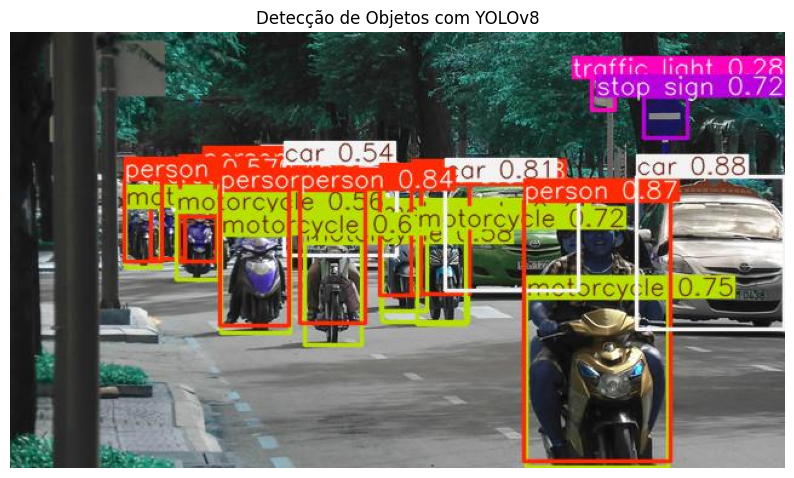

In [11]:

from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import os
import requests

# Função para baixar a imagem usando requests
def download_image(url, save_path):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(save_path, 'wb') as f:
            f.write(response.content)
        print(f"Imagem baixada e salva em {save_path}")
    else:
        raise Exception(f"Falha ao baixar a imagem. Código HTTP: {response.status_code}")

# URL da imagem escolhida
image_url = "https://farm4.staticflickr.com/3666/10277303256_a6a11a9d4b_z.jpg"
image_path = "selected_image.jpg"

# Baixar a imagem
if not os.path.exists(image_path):
    download_image(image_url, image_path)

# Verificar se a imagem foi baixada corretamente
if not os.path.exists(image_path) or os.path.getsize(image_path) == 0:
    raise FileNotFoundError("A imagem não foi baixada corretamente ou está vazia.")

# Carregar o modelo YOLOv8
model = YOLO('yolov8n.pt')  # Modelo YOLO nano pré-treinado no COCO

# Realizar a detecção de objetos
results = model(image_path)

# Obter a imagem processada diretamente do método Results
for result in results:
    result_image = result.plot()  # Gera a imagem processada com bounding boxes

# Salvar a imagem processada
output_image_path = "detected_image.jpg"
Image.fromarray(result_image).save(output_image_path)

# Carregar e exibir a imagem resultante
output_image = Image.open(output_image_path)

# Exibir a imagem com as detecções
plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.axis('off')
plt.title("Detecção de Objetos com YOLOv8")
plt.show()


